In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg

## 1. Датасет. Основная информация

In [2]:
df = pd.read_csv("data/concrete_data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


[Датасет](https://www.kaggle.com/datasets/prathamtripathi/regression-with-neural-networking) содержит информацию о различных видах цемента и бетона

Столбцы:
1. Cement - вероятно, количество цемента в составе (в источнике не раскрыто значение этого параметра)
2. Fly Ash - количесво образующейся золы
3. Blast Furnace Slag - количество образованного шлака в доменной печи
4. Water - необходимое количество воды
5. Superplasticizer - жесткость цемента после высыхания
6. Coarse Aggregate - размер крупных частиц цемента
7. Насколько цемент мелкозернист (вероятно, размер отдельной гранулы)
8. Age - срок службы (время, которое может служить без обслуживания)
9. Strength - сила (вероятно, прочность на давление) бетона, кН

In [4]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


## 2.

Text(0, 0.5, 'Strength')

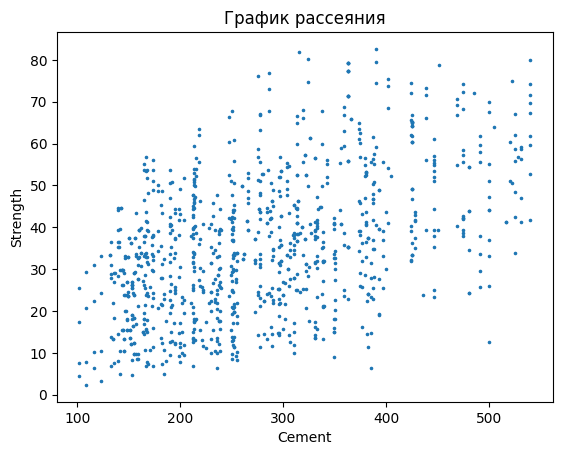

In [15]:
x = df["Cement"]
y = df["Strength"]

plt.scatter(x, y, s=2.5)
plt.title("График рассеяния")
plt.xlabel("Cement")
plt.ylabel("Strength")

In [22]:
print(f"Pearson correlation: {df["Strength"].corr(df["Cement"], method="pearson"):.3f}")
print(f"Spearman correlation: {df["Strength"].corr(df["Cement"], method="spearman"):.3f}")
print(f"Kendall Tau correlation: {df["Strength"].corr(df["Cement"], method="kendall"):.3f}")

Pearson correlation: 0.498
Spearman correlation: 0.478
Kendall Tau correlation: 0.327


Ближайший аналог $\verb|cor.test()|$

Значения слева направо:
1. размер выборки,
2. коэффициент корреляции (по умолчанию Пирсона),
3. 95% дов. интервал для $r$,
4. $p$-value (уровень значимости),
5. сила доказательства в пользу наличия связи,
6. мощность теста.

In [26]:
pg.corr(x, y)

,n,r,CI95%,p-val,BF10,power
pearson,1030,0.497832,"[0.45, 0.54]",1.324183e-65,1.106e+62,1.0


Тест утверждает, что зависимость между переменными есть (сила доказательства $\gg 1000$, мощность теста $1$ - метрики согласованы).
Также доверительный интервал не включает в себя $0$, а $p$-value $\ll 0,05$, что также говорит о том, что свзяь между переменными присуствует, и эти две метрики также согласованны.

## 3. Корреляционная матрица

In [6]:
df.corr()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
Cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
Blast Furnace Slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
Fly Ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
Water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
Superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
Coarse Aggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
Fine Aggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
Age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
Strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


<Axes: >

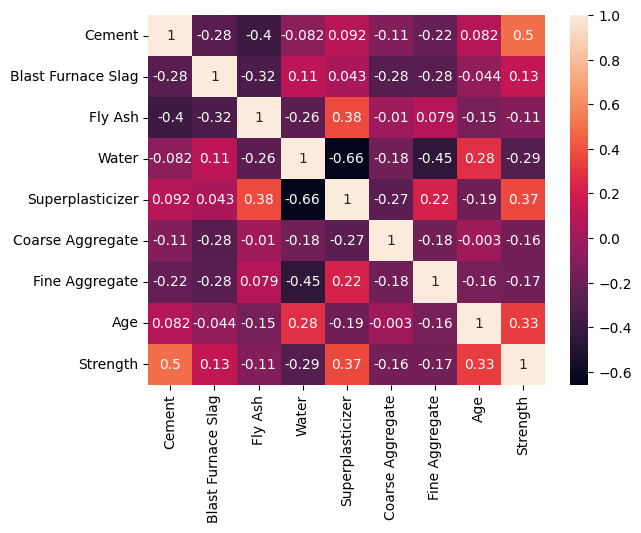

In [11]:
sns.heatmap(df.corr(), annot=True)